## Machine Learning


### Problem Formulation

* Removing unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure target is properly encoded also.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('cleaned_inspection_data.csv')
df.head()

,Name,Description,City,Violation Description,Violation Points,Grade,result,Inspection Year,Inspection Month,Inspection Type_Consultation/Education - Field,Inspection Type_Return Inspection,Inspection Type_Routine Inspection/Field Review,Inspection Closed Business_False,Inspection Closed Business_True,Violation Type_BLUE,Violation Type_RED
0,#807 TUTTA BELLA,Seating 0-12 - Risk Category III,SEATTLE,2120 - Proper cold holding temperatures ( 42 d...,5.0,2.0,0,2025,3,0,0,1,1,0,0,1
1,#807 TUTTA BELLA,Seating 0-12 - Risk Category III,SEATTLE,"3400 - Wiping cloths properly used, stored, sa...",5.0,2.0,0,2024,8,0,0,1,1,0,1,0
2,#807 TUTTA BELLA,Seating 0-12 - Risk Category III,SEATTLE,Other,5.0,2.0,0,2024,8,0,0,1,1,0,0,1
3,#807 TUTTA BELLA,Seating 0-12 - Risk Category III,SEATTLE,2120 - Proper cold holding temperatures ( 42 d...,5.0,2.0,0,2024,8,0,0,1,1,0,0,1
4,#807 TUTTA BELLA,Seating 0-12 - Risk Category III,SEATTLE,"3400 - Wiping cloths properly used, stored, sa...",5.0,2.0,1,2024,2,0,0,1,1,0,1,0


In [3]:
df.shape

(111051, 16)

In [4]:
# Grouping rare violation descriptions into 'Other'
top_violations = df['Violation Description'].value_counts().nlargest(10).index
df['Violation Description'] = df['Violation Description'].apply(lambda x: x if x in top_violations else 'Other')

# Grouping rare descriptions into 'Other'
top_descriptions = df['Description'].value_counts().nlargest(10).index
df['Description'] = df['Description'].apply(lambda x: x if x in top_descriptions else 'Other')

# Grouping rare cities
top_cities = df['City'].value_counts().nlargest(10).index
df['City'] = df['City'].apply(lambda x: x if x in top_cities else 'Other')


In [5]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Violation Description', 'Description', 'City']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Name,Description,City,Violation Description,Violation Points,Grade,result,Inspection Year,Inspection Month,Inspection Type_Consultation/Education - Field,Inspection Type_Return Inspection,Inspection Type_Routine Inspection/Field Review,Inspection Closed Business_False,Inspection Closed Business_True,Violation Type_BLUE,Violation Type_RED
0,#807 TUTTA BELLA,5,8,3,5.0,2.0,0,2025,3,0,0,1,1,0,0,1
1,#807 TUTTA BELLA,5,8,6,5.0,2.0,0,2024,8,0,0,1,1,0,1,0
2,#807 TUTTA BELLA,5,8,9,5.0,2.0,0,2024,8,0,0,1,1,0,0,1
3,#807 TUTTA BELLA,5,8,3,5.0,2.0,0,2024,8,0,0,1,1,0,0,1
4,#807 TUTTA BELLA,5,8,6,5.0,2.0,1,2024,2,0,0,1,1,0,1,0


### Correlation Heatmap

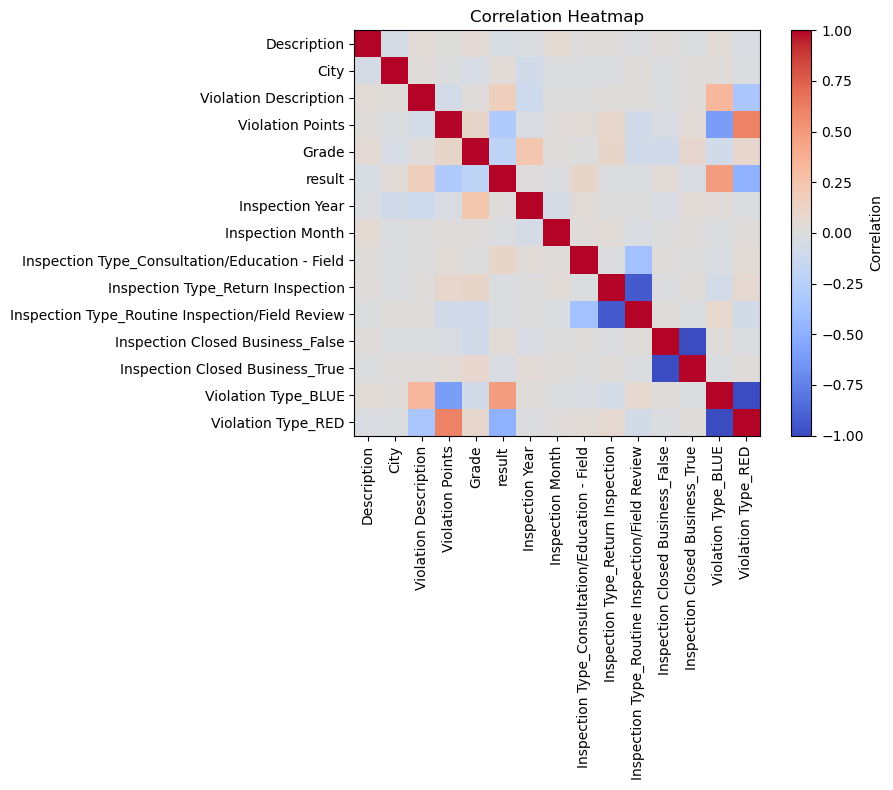

In [6]:
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

#  heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


### Train ML Algorithm
* Baseline- Random Forest (no tuning)


### Random Forest Model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


X = df.drop(columns=["result", "Name"])
y = df["result"]
 
# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trained Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))




Confusion Matrix:
 [[17084   769]
 [ 2746  1612]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     17853
           1       0.68      0.37      0.48      4358

    accuracy                           0.84     22211
   macro avg       0.77      0.66      0.69     22211
weighted avg       0.83      0.84      0.82     22211

ROC AUC Score: 0.6634102269138098
Accuracy: 0.8417450812660393


### Random Forest tuned with GridSeacrh CV


In [8]:
from sklearn.model_selection import GridSearchCV

# Defining parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight':      ['balanced']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

print("Best Params:", grid_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [9]:
best_model = grid_search.best_estimator_

# Predicted on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # for ROC AUC

# Evaluated metrics
print(" Evaluation of Best Model from GridSearchCV:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

 Evaluation of Best Model from GridSearchCV:
Accuracy: 0.9487641258835712
Precision: 0.8424074861760953
Recall: 0.908903166590179
F1 Score: 0.8743929359823399
ROC AUC Score: 0.9825037729083574


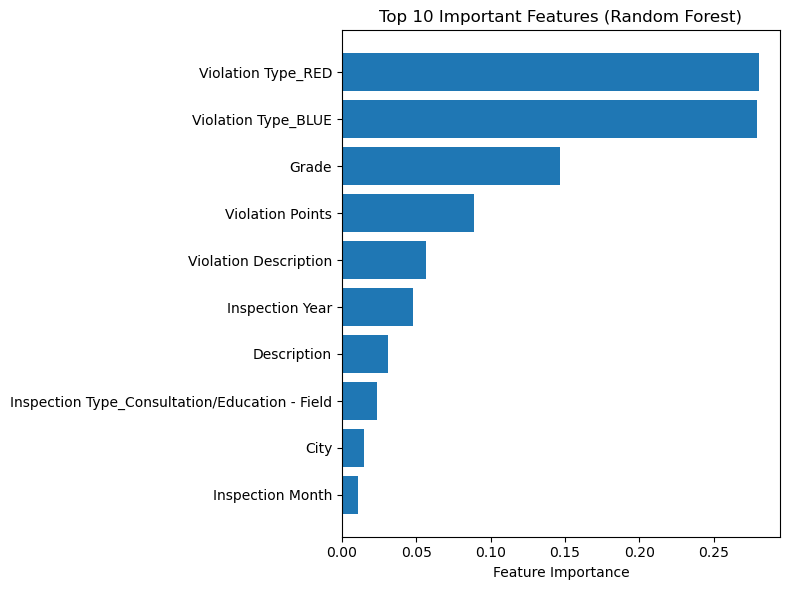

In [9]:
# Feature importance plot 
importances = rf.feature_importances_
indices = importances.argsort()[-10:]  # Top 10
features = X.columns[indices]

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features)
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features (Random Forest)")
plt.tight_layout()
plt.show()



### Evaluating Performance on Validation Sample

* Computing the usual metric for your ML task.


### Confusion Matrix

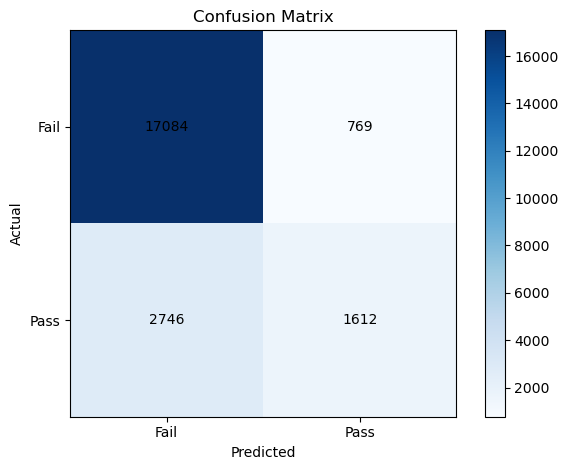

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Class labels
labels = ['Fail', 'Pass']


fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Adding labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

for i in range(len(cm)):
    for j in range(len(cm[0])):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.colorbar(im)
plt.tight_layout()
plt.show()


### ROC curve

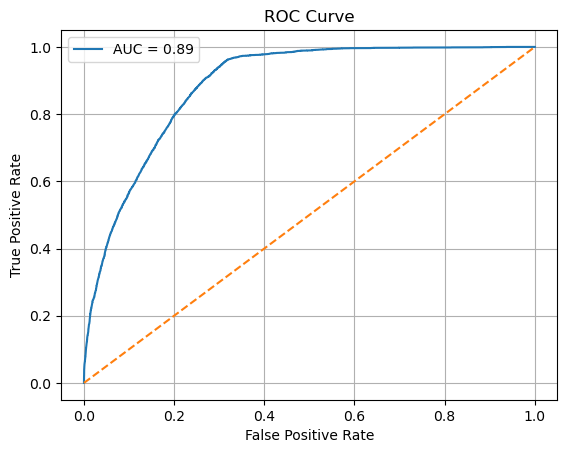

In [19]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

#### Checking for overfitting 

In [14]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Probabilities (for AUC)
y_train_proba = best_rf.predict_proba(X_train)[:, 1]
y_test_proba = best_rf.predict_proba(X_test)[:, 1]

# Metrics
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))
''
print("Train AUC:", roc_auc_score(y_train, y_train_proba))
print("Test AUC:", roc_auc_score(y_test, y_test_proba))


Train Accuracy: 0.8544236830256641
Test Accuracy: 0.8010445274863807
Train F1 Score: 0.7235534275270932
Test F1 Score: 0.6220169361046959
Train AUC: 0.9628501156017824
Test AUC: 0.8929951996683331


In [15]:
#it does look like overfitting but still not sure on taking measures to handle it
#will be doing another model - XGboosting

### XGB model

* Trying this model since it better handles overfitting in most cases

In [15]:
from xgboost import XGBClassifier

#  X and y
X = df.drop(columns=['result','Name'])   
y = df['result']                  

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
xgb_model = XGBClassifier(
    max_depth=3,
    n_estimators=100,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

#  Predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

#  Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[16962   891]
 [ 2596  1762]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     17853
           1       0.66      0.40      0.50      4358

    accuracy                           0.84     22211
   macro avg       0.77      0.68      0.70     22211
weighted avg       0.83      0.84      0.83     22211

ROC AUC Score: 0.8874852972314542
Accuracy: 0.8430057178875332


In [16]:
# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

y_train_proba = xgb_model.predict_proba(X_train)[:, 1]
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]


In [17]:
## Testing for overfitting: 
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))

print("Train AUC:", roc_auc_score(y_train, y_train_proba))
print("Test AUC:", roc_auc_score(y_test, y_test_proba))


Train Accuracy: 0.8416028815848717
Test Accuracy: 0.8430057178875332
Train F1 Score: 0.5033528622855933
Test F1 Score: 0.5026387105976323
Train AUC: 0.8886030036212335
Test AUC: 0.8874852972314542


In [75]:
#Looks like this model has better metrics
# I will be focusing most on :


## Main focus metrics:
* Using F1 score to check how well the model handles the trade-off between catching and avoiding failures.
* Using ROC AUC to evaluate how well the model separates the two classes overall.

### Trying tuned XGB for better metric score

In [18]:

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='f1', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best estimator
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8493539237314844
F1 Score: 0.5485698866702644
ROC AUC Score: 0.8984191418228212
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     17853
           1       0.67      0.47      0.55      4358

    accuracy                           0.85     22211
   macro avg       0.77      0.70      0.73     22211
weighted avg       0.84      0.85      0.84     22211



## Submission csv


In [28]:
# Bringing back 'Name' column from original df
X_test_with_name = X_test.copy()
X_test_with_name['Name'] = df.loc[X_test.index, 'Name']

# Mapping predictions to Pass/Fail
predicted_labels = ['Pass' if val == 0 else 'Fail' for val in y_pred]

# Created submission dataframe
submission_df = pd.DataFrame({
    'Name': X_test_with_name['Name'].values,
    'Predicted_Result': predicted_labels})

submission_df.to_csv('submission_xgboost.csv', index=False)
print(" submission_xgboost.csv saved.")


 submission_xgboost.csv saved.
